In [2]:
# Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import RandomState
rng = RandomState()

train = pd.read_csv("../../data/fetal_health_train.csv").sample(frac=1, random_state=rng)
print(train.shape)
test = pd.read_csv("../../data/fetal_health_test.csv").sample(frac=1, random_state=rng)
print(test.shape)

(1701, 22)
(425, 22)


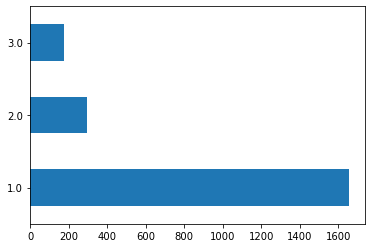

In [3]:
# are the classes balanced?
class_counts = train['fetal_health'].value_counts() + test['fetal_health'].value_counts()
class_counts.plot(kind = 'barh')

In [4]:
# Seperate test/train data into X and y (input and output)
X_train = train.drop('fetal_health', axis=1) 
y_train = train['fetal_health']
X_test = test.drop('fetal_health', axis=1)
y_test = test['fetal_health']

In [5]:
# Train the model using random forest (random forest good for imbalanced sets)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [9]:
# Make predictions
y_pred = regr.predict(X_test).round()

Mean Absolute Error: 0.26823529411764707
Mean Squared Error: 0.2776470588235294
Root Mean Squared Error: 0.5269222512131457


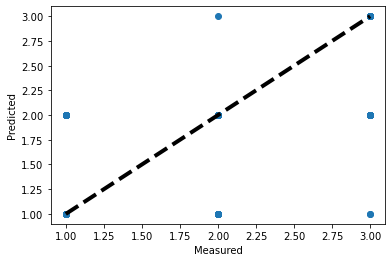

In [10]:
# get some metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot predictions vs expected
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [11]:
# Evaluate the model as a classifcation mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[258  73   0]
 [ 21  39   1]
 [  2  15  16]]
Accuracy 0.7364705882352941
